<a href="https://colab.research.google.com/github/sakshipagaria/Data-science-Machine-Learning/blob/main/ML_LAB10_T2_21%2C28%2C32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LAB:10  Model Selection

In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
print(dataset)

      gender   age  hypertension    bmi  HbA1c_level  blood_glucose_level  \
0     Female  80.0             0  25.19          6.6                  140   
1     Female  54.0             0  27.32          6.6                   80   
2       Male  28.0             0  27.32          5.7                  158   
3     Female  36.0             0  23.45          5.0                  155   
4       Male  76.0             1  20.14          4.8                  155   
...      ...   ...           ...    ...          ...                  ...   
1494  Female  51.0             0  27.32          4.5                   80   
1495    Male  21.0             0  18.86          4.8                  200   
1496    Male  47.0             0  27.83          4.8                  158   
1497  Female  21.0             0  25.44          4.5                  158   
1498    Male  32.0             0  27.26          6.0                  159   

      diabetes  
0            0  
1            0  
2            0  
3      

# EDA Steps

In [ ]:
dataset.head()

,gender,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,25.19,6.6,140,0
1,Female,54.0,0,27.32,6.6,80,0
2,Male,28.0,0,27.32,5.7,158,0
3,Female,36.0,0,23.45,5.0,155,0
4,Male,76.0,1,20.14,4.8,155,0


In [ ]:
dataset.describe()

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,41.251688,0.073382,27.021181,5.559506,139.130754,0.085390
std,22.745669,0.260850,6.737454,1.120024,39.857242,0.279555
min,0.080000,0.000000,10.300000,3.500000,80.000000,0.000000
25%,23.000000,0.000000,23.070000,4.800000,100.000000,0.000000
50%,42.000000,0.000000,27.320000,5.800000,145.000000,0.000000
75%,59.000000,0.000000,29.210000,6.200000,159.000000,0.000000
max,80.000000,1.000000,69.370000,9.000000,300.000000,1.000000


In [ ]:
dataset.shape

(1499, 7)

In [ ]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1499 non-null   object 
 1   age                  1499 non-null   float64
 2   hypertension         1499 non-null   int64  
 3   bmi                  1499 non-null   float64
 4   HbA1c_level          1499 non-null   float64
 5   blood_glucose_level  1499 non-null   int64  
 6   diabetes             1499 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 82.1+ KB


In [ ]:
dataset['gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
dataset.head()

,gender,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,25.19,6.6,140,0
1,1,54.0,0,27.32,6.6,80,0
2,0,28.0,0,27.32,5.7,158,0
3,1,36.0,0,23.45,5.0,155,0
4,0,76.0,1,20.14,4.8,155,0


In [ ]:
X = dataset.iloc[:,:-1].values 
print(X)
y = dataset.iloc[:,-1].values 
print(y)

[[  1.    80.     0.    25.19   6.6  140.  ]
 [  1.    54.     0.    27.32   6.6   80.  ]
 [  0.    28.     0.    27.32   5.7  158.  ]
 ...
 [  0.    47.     0.    27.83   4.8  158.  ]
 [  1.    21.     0.    25.44   4.5  158.  ]
 [  0.    32.     0.    27.26   6.   159.  ]]
[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
print(X_train)

[[  1.    27.     0.    23.2    4.5  200.  ]
 [  0.     4.     0.    15.64   4.8  155.  ]
 [  0.    42.     0.    27.32   5.7  160.  ]
 ...
 [  1.    45.     0.    34.09   5.7   90.  ]
 [  1.    71.     0.    27.32   5.   126.  ]
 [  0.    71.     0.    37.5    6.   140.  ]]


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1124, 6) (1124,)
Test set: (375, 6) (375,)


## KNN

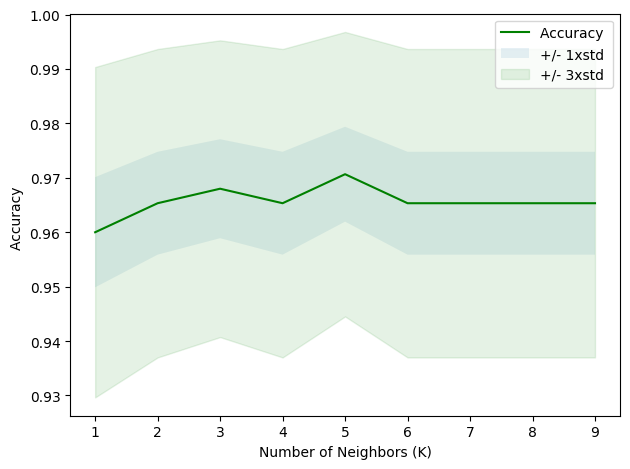

The best accuracy was with 0.9706666666666667 with k= 5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
  knn1 = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
  yhat=knn1.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
  std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),
                  mean_acc - 1 * std_acc,
                  mean_acc + 1 * std_acc,
                  alpha=0.10)
plt.fill_between(range(1,Ks),
                  mean_acc - 3 * std_acc,
                  mean_acc + 3 * std_acc,
                  alpha=0.10,color="green")

plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with",mean_acc.max(), "with k=",mean_acc.argmax()+1)

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 5))
weight_options = ['uniform', 'distance']
pow = [1,2]
param_grid = dict(n_neighbors=k_range,weights=weight_options,p = pow)
knn_gs = KNeighborsClassifier()
grid_k = GridSearchCV(knn_gs,param_grid,cv=10,scoring='accuracy')
grid_k.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", grid_k.best_params_)
print("Accuracy :",grid_k.best_score_)


Tuned Hyperparameters : {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy : 0.9590628950695324


In [ ]:
knn1 = KNeighborsClassifier(n_neighbors= 16, p = 1,weights = 'uniform')
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16, p=1)

In [ ]:
yhat = knn1.predict(X_test)
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
a1 = jaccard_score(y_test,yhat,pos_label=1,average='weighted')
b1 = f1_score(y_test, yhat, average='weighted')
c1 = accuracy_score(y_test, yhat)
print('The jaccard_score of the KNN for k = 7 classifier on train data is {:.2f}'.format(a1))
print('The F1-score of the KNN for k = 7 classifier on train data is {:.2f}'.format(b1))
print('The Accuracy_score of the KNN for k = 7 classifier on train data is {:.2f}'.format(c1))

The jaccard_score of the KNN for k = 7 classifier on train data is 0.90
The F1-score of the KNN for k = 7 classifier on train data is 0.94
The Accuracy_score of the KNN for k = 7 classifier on train data is 0.95


## Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
}
tree_clas = DecisionTreeClassifier(random_state=11)
grid_search = GridSearchCV(estimator=tree_clas,param_grid=param_grid,cv=5,verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
print("Tuned Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Tuned Hyperparameters : {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}
Accuracy : 0.9715238095238096


In [ ]:
diabetes_level = grid_search.best_estimator_
print(diabetes_level)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6,
                       max_features='auto', random_state=11)


In [ ]:
diabetes_level.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6,
                       max_features='auto', random_state=11)

In [ ]:
predTree = diabetes_level.predict(X_test)
a2 = jaccard_score(y_test, predTree,pos_label=1,average='weighted')
b2 = f1_score(y_test, predTree, average='weighted')
c2 = accuracy_score(y_test, predTree)
print("The accuraccy of (diabetes_level) DecisionTrees's {:.2f} ".format(c2))
print('The jaccard_score of the DecisionTrees classifier is {:.2f}'.format(a2))
print('The F1-score of the DecisionTrees classifier is {:.2f}'.format(b2))

The accuraccy of (diabetes_level) DecisionTrees's 0.98 
The jaccard_score of the DecisionTrees classifier is 0.97
The F1-score of the DecisionTrees classifier is 0.98


## SVM

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100],
'gamma': [1,0.1,0.01,0.001],
'kernel': ['rbf', 'poly', 'sigmoid']}
grid_s = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_s.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print("Tuned Hyperparameters :", grid_s.best_params_)
print("Accuracy :",grid_s.best_score_)

Tuned Hyperparameters : {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy : 0.9661944444444444


In [ ]:
svm = SVC(probability=True,C=0.1, gamma=1, kernel='sigmoid')
print(svm)

SVC(C=0.1, gamma=1, kernel='sigmoid', probability=True)


In [ ]:
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='sigmoid', probability=True)

In [ ]:
yhat_s = svm.predict(X_test)
a3 = jaccard_score(y_test, yhat_s,pos_label=1,average='weighted')
b3 = f1_score(y_test, yhat_s, average='weighted')
c3 = accuracy_score(y_test, yhat_s)
print("The accuraccy of svm classifier on training data is {:.2f} out of 1".format(svm.score(X_train,y_train)))
print("The accuraccy of svm classifier on training data is {:.2f} out of 1".format(svm.score(X_test,y_test)))
print('The jaccard_score of the svm classifier on training data is {:.2f}'.format(a3))
print('The F1-score of the svm classifier on train data is {:.2f}'.format(b3))
print("The accuraccy of svm classifier on train data is {:.2f} ".format(c3))

The accuraccy of svm classifier on training data is 0.88 out of 1
The accuraccy of svm classifier on training data is 0.90 out of 1
The jaccard_score of the svm classifier on training data is 0.82
The F1-score of the svm classifier on train data is 0.86
The accuraccy of svm classifier on train data is 0.90 


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {
'penalty' : ['l1','l2'],
'C' : np.logspace(-3,3,7),
'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg,
                   param_grid = parameters, scoring = 'accuracy',cv = 3)
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
42 fits failed out of a total of 126.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9635294117647059


In [ ]:
log_reg = clf.best_estimator_
log_reg.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
yhat_l = log_reg.predict(X_test)
a4 = jaccard_score(y_test, yhat_l,pos_label=1,average='weighted')
b4 = f1_score(y_test, yhat_l, average='weighted')
c4 = accuracy_score(y_test, yhat_l)
print('The jaccard_score of the LR classifier on train data is {:.2f}'.format(a4))
print('The F1-score of the LR classifier on train data is {:.2f}'.format(b4))
print('The accuracy_score of the LR classifier on train data is {:.2f}'.format(c4))

The jaccard_score of the LR classifier on train data is 0.95
The F1-score of the LR classifier on train data is 0.97
The accuracy_score of the LR classifier on train data is 0.97


### *Model Evaluation*

In [ ]:
result_df=pd.DataFrame({'Model':['KNN',
'Decision Tree',
'SVM',
'Logistic Regression'],
'Jaccard Score' : [a1,a2,a3,a4],
'F1 Score' : [b1,b2,b3,b4],
'Accuracy Score':[c1,c2,c3,c4]})
print(result_df)

                 Model  Jaccard Score  F1 Score  Accuracy Score
0                  KNN       0.901341  0.940197        0.949333
1        Decision Tree       0.968277  0.983296        0.984000
2                  SVM       0.816776  0.863736        0.896000
3  Logistic Regression       0.949365  0.972578        0.973333


## ***using K-fold cross validation***

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

KNN: 0.963527 (0.011540)
DT: 0.963527 (0.011540)
SVM: 0.963527 (0.011540)
LR: 0.963527 (0.011540)


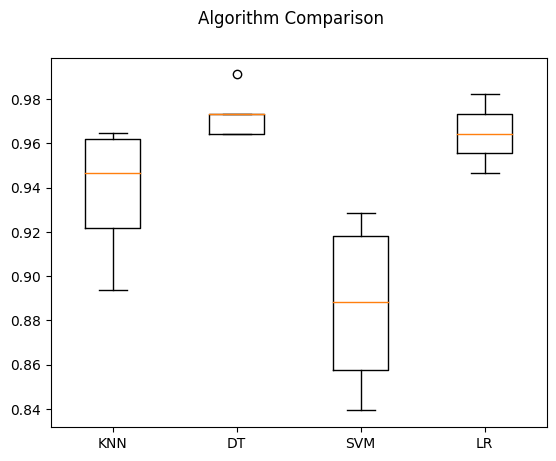

In [69]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', knn1))
models.append(('DT' , diabetes_level))
models.append(('SVM', svm))
models.append(('LR', log_reg))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name,model in models:
  kfold = model_selection.KFold(n_splits=10,
                                random_state=seed,
                                shuffle=True)
  cv_results = model_selection.cross_val_score(model,
                                               X_train,
                                               y_train,
                                               cv=kfold,
                                               scoring=scoring)
  results.append(cv_results)
  names.append(name)
for name,model in models:
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Plotting ROC_AUC Curce

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Instantiate the classfiers and make a list
classifiers = [knn1,diabetes_level,svm,log_reg]
model = ['KNN','Decision Tree','SVM','Logistic Regression']
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['model', 'fpr','tpr','auc'])
# Train the models and record the results
for cls in classifiers:
  model = cls.fit(X_train, y_train)
  yproba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = roc_curve(y_test, yproba)
  auc = roc_auc_score(y_test, yproba)
  result_table = result_table.append({'model':cls.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('model', inplace=True)

<ipython-input-60-ece9eb76fb09>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'model':cls.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
<ipython-input-60-ece9eb76fb09>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'model':cls.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc}, ignore_index=True)
<ipython-input-60-ece9eb76fb09>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result

In [ ]:
print(result_table)

                                                                      fpr  \
model                                                                       
KNeighborsClassifier    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002...   
DecisionTreeClassifier  [0.0, 0.0, 0.4281524926686217, 0.8357771260997...   
SVC                     [0.0, 0.002932551319648094, 0.0175953079178885...   
LogisticRegression      [0.0, 0.0, 0.0, 0.002932551319648094, 0.002932...   

                                                                      tpr  \
model                                                                       
KNeighborsClassifier    [0.0, 0.029411764705882353, 0.2058823529411764...   
DecisionTreeClassifier           [0.0, 0.8235294117647058, 1.0, 1.0, 1.0]   
SVC                     [0.0, 0.0, 0.0, 0.029411764705882353, 0.029411...   
LogisticRegression      [0.0, 0.029411764705882353, 0.6176470588235294...   

                             auc  
model                             
KNei

## ***Plot The Figure***

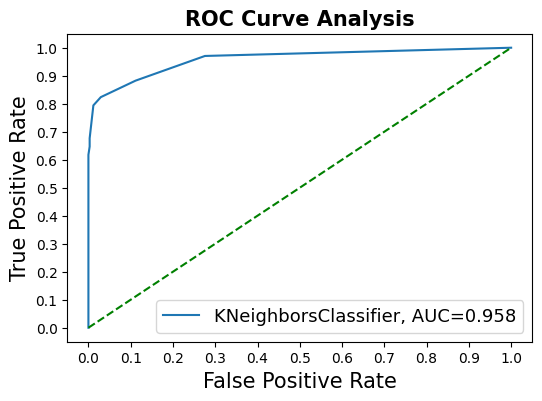

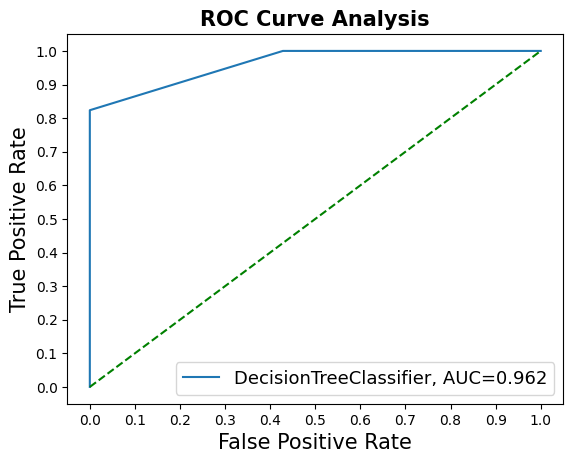

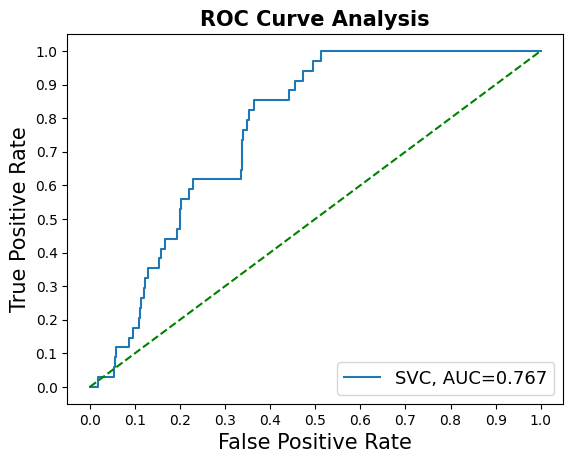

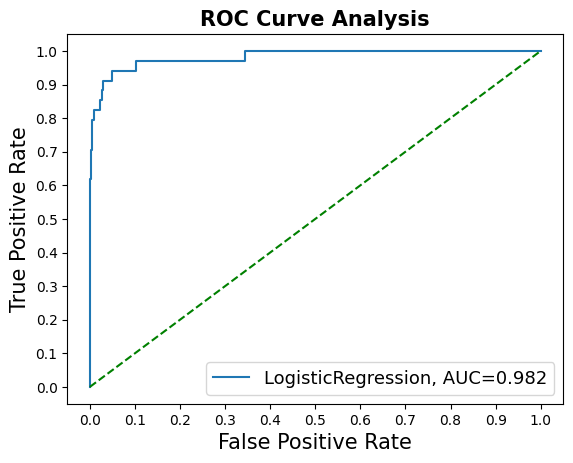

In [ ]:
fig = plt.figure(figsize=(6,4))
for i in result_table.index:
  plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
  plt.plot([0,1], [0,1], color='green', linestyle='--')
  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("False Positive Rate", fontsize=15)
  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)
  plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')
  plt.show()